![image](screen10.png)

Il teorema di thevenin afferma che:
Il comportamento di ua rete comunque complessa ai fini di un'utilizzazzione al suo esterno a partire da due suoi punti, A e B, è equivalente a quello di un generatore di tensione V0 in serie ad una resistenza R0, dove V0 = VA - VB, cioè V0 è la differenza di potenziale tra i punti A e B quando all'esterno della rete il circuito è apero ed R0 = V0/l0 , con l0 corrente che si avrebbe all'esterno del circuito in una connessione di corto-circuito (R=0)
Nel caso semplice da noi considerato la relazione toerica di R0 e V0 sarà ovviamente data da:
V0 = R2/(R1+R2)
R0 = R1*R2/(R1+R2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Tiamat as tiam
from scipy.stats import linregress

Slope: -0.0011121664405246508, Intercept: 7.471250565355043
Matrice di covarianza:
[[ 4.68812551e-10 -8.85003285e-09]
 [-8.85003285e-09  9.24397890e-06]]
consistenza:, (True, 0.4996584722496116)
Misura la consistenza tra intercept e v0!!


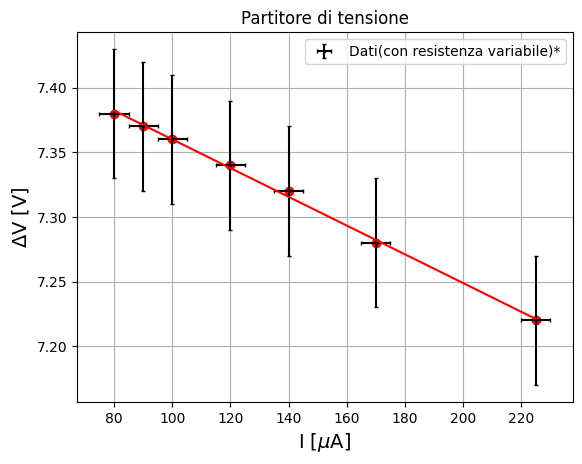

In [4]:
#Stiamo lavorando con una differenza di potenziale di 15V, fondoscala 500uA variamo la resistenza di un passo pari ad 10KOmm
I = np.array([225, 170, 140, 120, 100, 90, 80])
V = np.array([ 7.22, 7.28, 7.32, 7.34, 7.36, 7.37, 7.38])

fs_I=500                        # Fondoscala 500 muA
dI=(fs_I/50)                    # ci sono 50 tacche
err_I=(dI/2)                    # considero la mezza tacca come errore
err_I=err_I*np.ones(len(I))     # costruisco il vettore degli errori

err_V= np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]) # errore costante sul voltmetro

slope,intercept,cov_matrix = tiam.fit_lineare(I,V,err_I,err_V)

plt.errorbar(I, V, xerr=err_I, yerr=err_V, fmt='*', markersize=2, capsize=1.5, c='k', label='Dati(con resistenza variabile)*')
plt.plot(I,intercept + slope*I,color='red')
plt.scatter(I, V, c='r')
plt.legend()
plt.ylabel(r'$\Delta$V [V]', size=14)
plt.xlabel(r'I [$\mu$A]', size=14)
plt.title('Partitore di tensione')
plt.grid()

print("consistenza:,",tiam.consistenza_statistica(slope,600*10**(-6),cov_matrix[0][0],2))
print("Misura la consistenza tra intercept e v0!!")

plt.savefig('partitoresingolo', dpi=125)
plt.show()


Il circuito a cascata considerato è dal punto di vista formale identico

![image](screen11.png)

Slope: -0.0005845203060623898, Intercept: 1.9881489111241901
Matrice di covarianza:
[[ 2.16655814e-10 -2.47095060e-09]
 [-2.47095060e-09  3.56201854e-06]]
consistenza:, (True, 0.4997637223977721)
Misura la consistenza tra intercept e v0


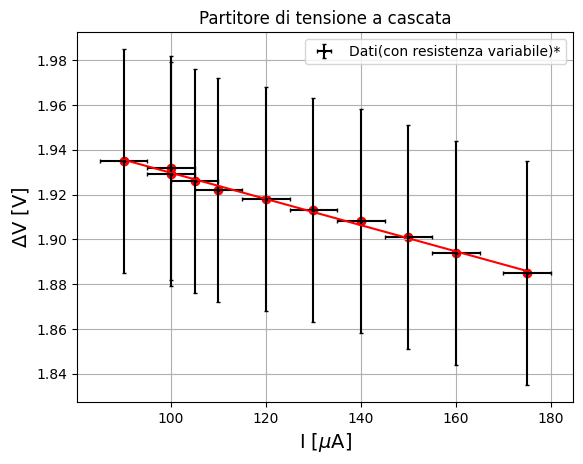

In [3]:
I2 = np.array([175, 160, 150, 140, 130, 120, 110, 105, 100, 100, 90])
V2 = np.array([1.885, 1.894, 1.901, 1.908, 1.913, 1.918, 1.922, 1.926, 1.929, 1.932, 1.935])


fs_I2=500
dI=(fs_I2/50)
err_I2=(dI/2)
err_I2=err_I2*np.ones(len(I2))

err_V2= np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

slope,intercept,cov_matrix = tiam.fit_lineare(I2,V2,err_I,err_V)

plt.errorbar(I2, V2, xerr=err_I2, yerr=err_V2, fmt='*', markersize=2, capsize=1.5, c='k', label='Dati(con resistenza variabile)*')
plt.plot(I2,intercept + slope*I2,color='red')
plt.scatter(I2, V2, c='r')
plt.legend()
plt.ylabel(r'$\Delta$V [V]', size=14)
plt.xlabel(r'I [$\mu$A]', size=14)
plt.title('Partitore di tensione a cascata')
plt.grid()

plt.savefig('partitoresingolo', dpi=125)

# Fai attenzione !!
# Qui sei in presenza di errori misti, non puoi applicazre
# la consistenza statistica così
print("consistenza:,",tiam.consistenza_statistica(slope,600*10**(-6),cov_matrix[0][0],2))
print("Misura la consistenza tra intercept e v0!")

plt.show()
